In [3]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("shape of X train : ",X_train.shape)
print("shape of y train : ", y_train.shape)
print("Shape of X test : ", X_test.shape)
print("Shape of y test : ", y_test.shape)

shape of X train :  (60000, 28, 28)
shape of y train :  (60000,)
Shape of X test :  (10000, 28, 28)
Shape of y test :  (10000,)


In [5]:
def plot_img(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.show()

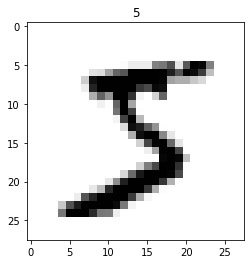

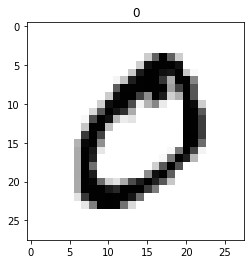

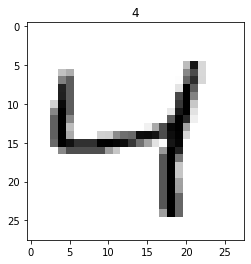

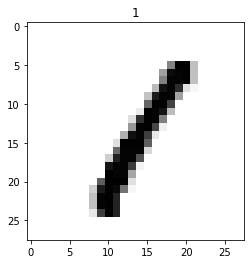

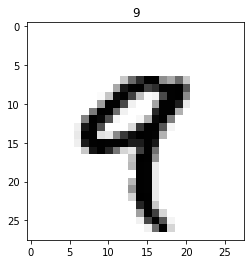

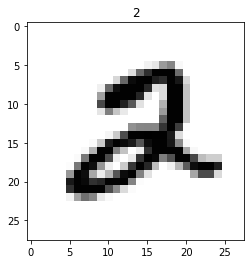

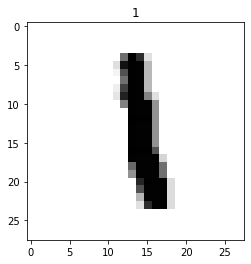

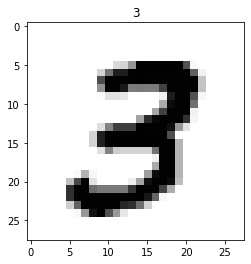

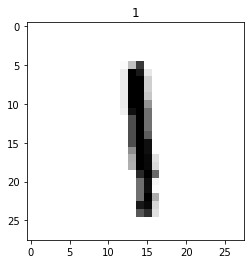

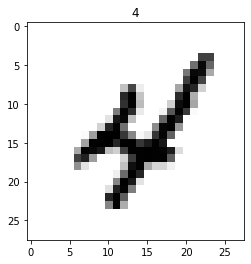

In [6]:
for i in range(10):
    plot_img(i)

In [7]:

X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

## changing the dimensions and expamding to (, , , -1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [11]:
y_train.shape

(60000,)

In [7]:
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [8]:
y_test, y_train

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32))

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))


model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [15]:
model.compile(optimizer='adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1)

#model check point
mc = ModelCheckpoint("./readymodel.h5", monitor="val_acc", verbose=1, save_best_only=True)
cb = [es,mc]

In [17]:
# model training

his = model.fit(X_train, y_train, epochs=5, validation_split=0.3, callbacks=cb)

#his = model.fit(X_train, y_train, epochs=5, validation_split=0.3, callbacks = cb)

Epoch 1/5
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0792 - accuracy: 0.9755 - val_loss: 0.0590 - val_accuracy: 0.9818
Epoch 2/5
  81/1313 [>.............................] - ETA: 12s - loss: 0.0747 - accuracy: 0.9776

KeyboardInterrupt: 

In [14]:
model_S = keras.models.load_model("C:\\Users\\AKSHAY KUMAR\\Documents\\handwritten_model\\readymodel.h5")

OSError: No file or directory found at C:\Users\AKSHAY KUMAR\Documents\handwritten_model\readymodel.h5